# Clean data

In [1]:
import pandas as pd
import utils
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from tqdm import tqdm

In [2]:
# SP500
df_1 = pd.read_csv("sp500-info.csv", index_col="Date", parse_dates=True)

print(sum(df_1.isna().sum() != 0), "stock(s) don't have enough value.")

df_clean_1 = utils.clean_data(df_1, out_df_dir="sp500_clean.csv")

# SP400
df_2 = pd.read_csv("sp400-info.csv", index_col="Date", parse_dates=True)

print(sum(df_2.isna().sum() != 0), "stock(s) don't have enough value.")

df_clean_2 = utils.clean_data(df_2, out_df_dir="sp400_clean.csv")

df_clean = pd.concat([df_clean_1, df_clean_2], axis = 1)
df_clean

2 stock(s) don't have enough value.
8 stock(s) don't have enough value.


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WU,WWD,WWE,X,XPO,XRX,Y,YELP,YETI,ZD
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-23,62.521873,10.250000,76.780159,55.566658,58.500195,71.623451,132.339996,60.947273,139.870514,307.269989,...,17.245872,49.938290,37.082069,5.389979,25.826542,14.611341,452.839996,18.510000,15.580000,54.808697
2020-03-24,66.103294,13.920000,84.487518,61.141407,61.212063,77.358749,143.669998,67.612480,152.680710,310.000000,...,17.766504,57.433014,38.379738,5.895289,26.885914,15.899240,486.739990,20.639999,18.650000,57.791306
2020-03-25,68.076515,15.390000,88.390114,60.804588,61.593002,72.999146,146.889999,68.640869,147.784409,305.910004,...,17.887362,65.196098,33.798553,5.816025,31.135040,16.887844,515.830017,21.059999,21.330000,57.286957
2020-03-26,72.733368,15.660000,94.992233,64.004311,66.962318,81.534279,149.169998,73.550034,166.785522,322.670013,...,19.300501,70.136261,34.358917,6.053819,34.237484,17.840162,559.969971,21.790001,22.139999,60.617390
2020-03-27,69.960960,14.040000,93.505516,61.354385,65.910217,79.228539,145.240005,72.337288,158.550430,305.829987,...,18.352211,61.637608,33.228363,5.726853,30.803261,16.223343,547.799988,18.639999,20.930000,58.486958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-18,123.839996,18.540001,218.250000,165.070007,159.360001,161.899994,301.510010,116.290001,313.600006,425.470001,...,18.940001,117.430000,59.860001,37.160000,55.020000,19.040001,839.309998,34.599998,54.400002,96.389999
2022-04-19,126.529999,19.590000,222.899994,167.399994,156.350006,162.850006,323.420013,119.980003,320.570007,436.399994,...,19.240000,120.699997,60.270000,37.779999,56.349998,19.559999,837.280029,35.090000,56.320000,99.110001
2022-04-20,129.369995,19.480000,228.020004,167.229996,156.699997,165.729996,325.980011,122.639999,323.670013,428.109985,...,19.400000,123.199997,60.779999,36.910000,57.189999,19.850000,837.010010,34.529999,55.820000,98.010002


# Calcualte correlation

In [3]:
start = 0
end = 527
df_cor = utils.calculate_cor(df_clean, start, end)
df_cor

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WU,WWD,WWE,X,XPO,XRX,Y,YELP,YETI,ZD
A,1.000000,0.243473,0.426513,0.511663,0.384574,0.362175,0.510486,0.572998,0.634462,0.584454,...,0.317153,0.422017,0.181802,0.281987,0.500520,0.376995,0.350872,0.338202,0.471803,0.433803
AAL,0.243473,1.000000,0.345263,0.182484,0.121763,0.214144,0.231398,0.083237,0.292127,0.081956,...,0.351179,0.630058,0.246261,0.419780,0.412076,0.520238,0.420036,0.463906,0.378097,0.343147
AAP,0.426513,0.345263,1.000000,0.317284,0.323391,0.449402,0.231922,0.258041,0.494561,0.262758,...,0.413392,0.490788,0.228806,0.361454,0.477406,0.442808,0.445638,0.337106,0.458341,0.313467
AAPL,0.511663,0.182484,0.317284,1.000000,0.266375,0.242729,0.406266,0.409222,0.527105,0.644021,...,0.255769,0.260200,0.254228,0.117424,0.318345,0.303773,0.256133,0.317869,0.457751,0.355136
ABBV,0.384574,0.121763,0.323391,0.266375,1.000000,0.457033,0.173023,0.423997,0.415465,0.243443,...,0.214299,0.258770,0.130369,0.143638,0.245230,0.218259,0.296360,0.165190,0.153003,0.189675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRX,0.376995,0.520238,0.442808,0.303773,0.218259,0.381968,0.239162,0.220216,0.469191,0.219311,...,0.466903,0.653291,0.300820,0.438291,0.494850,1.000000,0.548206,0.536182,0.359248,0.408479
Y,0.350872,0.420036,0.445638,0.256133,0.296360,0.450501,0.210418,0.249147,0.463226,0.141981,...,0.470007,0.624342,0.200843,0.375881,0.453043,0.548206,1.000000,0.399895,0.246672,0.323416
YELP,0.338202,0.463906,0.337106,0.317869,0.165190,0.280502,0.253462,0.189190,0.413771,0.286715,...,0.403772,0.532416,0.332074,0.352685,0.465782,0.536182,0.399895,1.000000,0.367714,0.379909
YETI,0.471803,0.378097,0.458341,0.457751,0.153003,0.251612,0.370559,0.323579,0.430691,0.453187,...,0.272721,0.413792,0.157911,0.247797,0.483097,0.359248,0.246672,0.367714,1.000000,0.383954


# Create quantile and mean, variance of correlation values

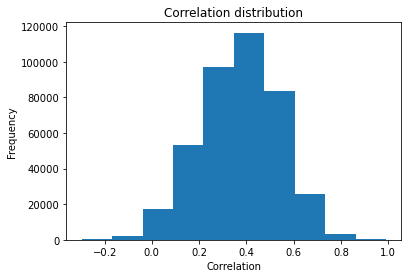

In [28]:
sercurity_code = np.array(df_cor.columns.values.tolist())
n = len(sercurity_code) # number of stocks
# Correlation vector
correlation = []
for i in range(n-1):
    for j in range(i+1,n):
        correlation.append(df_cor.iloc[i].iloc[j])
npcorrelation = np.asarray(correlation)
plt.hist(npcorrelation)
plt.xlabel("Correlation")
plt.ylabel("Frequency")
plt.title("Correlation distribution")
plt.show()

# Create 2 financial networks
## Network 1: Most correlated stocks
## Network 2: Least Correlated stocks

In [5]:
# Network 1
# 98.9% most correlated stocks
# Threshold 1
QUANTILE_1 = 0.989
threshold_1 = np.quantile(npcorrelation, QUANTILE_1)
threshold_1

network_1 = nx.Graph()

for item in sercurity_code:
    network_1.add_node(item)
    
for u in network_1.nodes:
    for v in network_1.nodes:
        if u != v and df_cor[u][v] > threshold_1:
            network_1.add_edge(u, v)

# Write network to file for ploting
nx.write_gexf(network_1, "network_1.gexf")

# Count node invovle in the connected comm
t = 0
de = list(network_1.degree)
for item in de:
    if item[1] > 0:
        t=t+1
print(f"Nodes involve in the connected component of network 1: {t}")

Nodes involve in the connected component of network 1: 524


In [6]:
# Network 2
# 1.1% least correlated stock
# Threshold 2
QUANTILE_2 = 0.011
threshold_2 = np.quantile(npcorrelation, QUANTILE_2)
threshold_2

network_2 = nx.Graph()

for item in sercurity_code:
    network_2.add_node(item)
    
for u in network_2.nodes:
    for v in network_2.nodes:
        if u != v and df_cor[u][v] < threshold_2:
            network_2.add_edge(u, v)

# Write network to file for ploting
nx.write_gexf(network_2, "network_2.gexf")

# Count node invovle in the connected comm
t = 0
de = list(network_2.degree)
for item in de:
    if item[1] > 0:
        t=t+1
print(f"Nodes involve in the connected component of network 2: {t}")

Nodes involve in the connected component of network 2: 752


In [7]:
# Since both network 1 and 2 have the same number of link and node
# their average degree is the same

# Number of nodes, edges, average degree of network 
n_node = network_1.number_of_nodes()
n_link = network_1.number_of_edges()
avg_degree_12 = 2*n_link/n_node
print(f"Networks nodes: {n_node}")
print(f"Network links: {n_link}")
print(f"Average degree: {avg_degree_12}")
print(f"Density of network 1 and 2: {nx.density(network_1)}")

Networks nodes: 894
Network links: 4391
Average degree: 9.823266219239374
Density of network 1 and 2: 0.011000298117849243


In [8]:
# create BA with approximative density to network 1 and 2
m = 5
ba_model= nx.barabasi_albert_graph(n_node, m)
# Check the density of BA model 
print(f"Density of BA model: {nx.density(ba_model)}")
nx.write_gexf(ba_model, "ba_model.gexf")

Density of BA model: 0.01113557848641309


In [9]:
er_model = nx.fast_gnp_random_graph(n_node, 0.011)
print(f"Density of ER model: {nx.density(er_model)}")
nx.write_gexf(er_model, "er_model.gexf")

Density of ER model: 0.010982761773776151


In [10]:
# The fucntion return a list of length of shorted paths
def shorted_path_distribution(g):
    length_dict = dict(nx.shortest_path_length(g))
    density_of_length = []
    for key1 in length_dict.keys():
        dict_of_key = length_dict[key1]
        for key2 in dict_of_key.keys():
            if dict_of_key[key2] != 0:
                density_of_length.append(dict_of_key[key2])
    return density_of_length

def plot_shorted_path_dist(network, title, ax):
    den = shorted_path_distribution(network)
    ax.hist(den, bins = range(max(den)+1)[1:])
    ax.set_title(title)
    ax.set_xlabel("Length")
    ax.set_ylabel("Frequency")
    
    

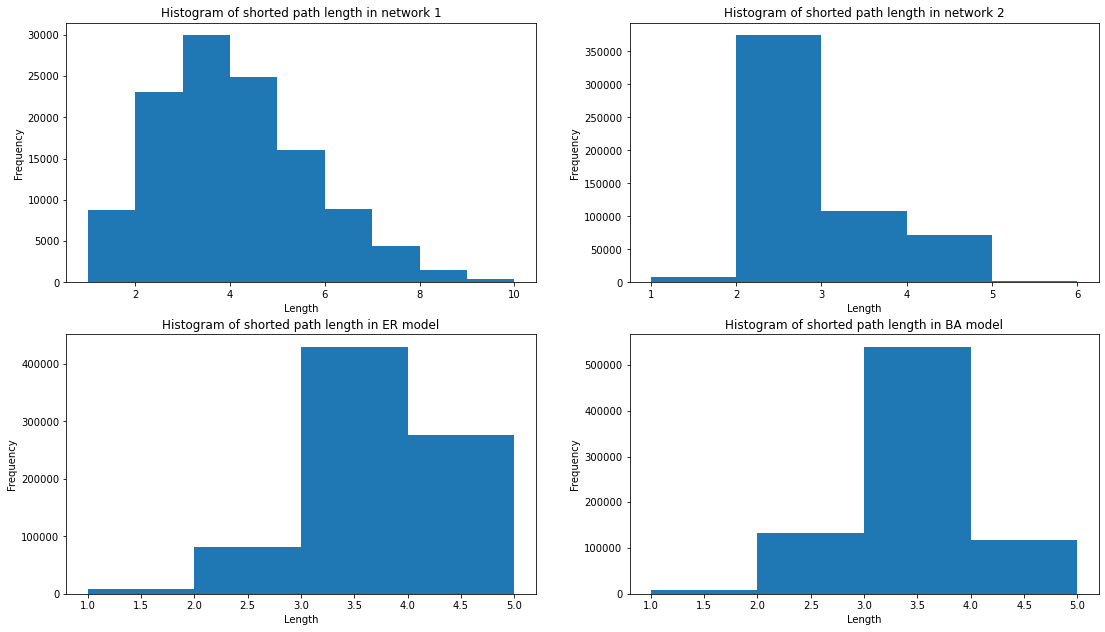

In [11]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(18.5, 10.5, forward=True)
plot_shorted_path_dist(network_1, "Histogram of shorted path length in network 1", axs[0,0])
plot_shorted_path_dist(network_2, "Histogram of shorted path length in network 2", axs[0,1])
plot_shorted_path_dist(er_model, "Histogram of shorted path length in ER model", axs[1,0])
plot_shorted_path_dist(ba_model, "Histogram of shorted path length in BA model",axs[1,1])


In [29]:
# Connected components
def largest_component(network):
    largest_cc = len(max(nx.connected_components(network), key=len))
    return largest_cc/n

print(f"Size of largest component compare to the network, in network 1: {largest_component(network_1)}")
print(f"Size of largest component compare to the network, in network 2: {largest_component(network_2)}")
print(f"Size of largest component compare to the network, in ER model: {largest_component(er_model)}")
print(f"Size of largest component compare to the network, in BA model: {largest_component(ba_model)}")


Size of largest component compare to the network, in network 1: 0.3814317673378076
Size of largest component compare to the network, in network 2: 0.8411633109619687
Size of largest component compare to the network, in ER model: 0.9988814317673378
Size of largest component compare to the network, in BA model: 1.0


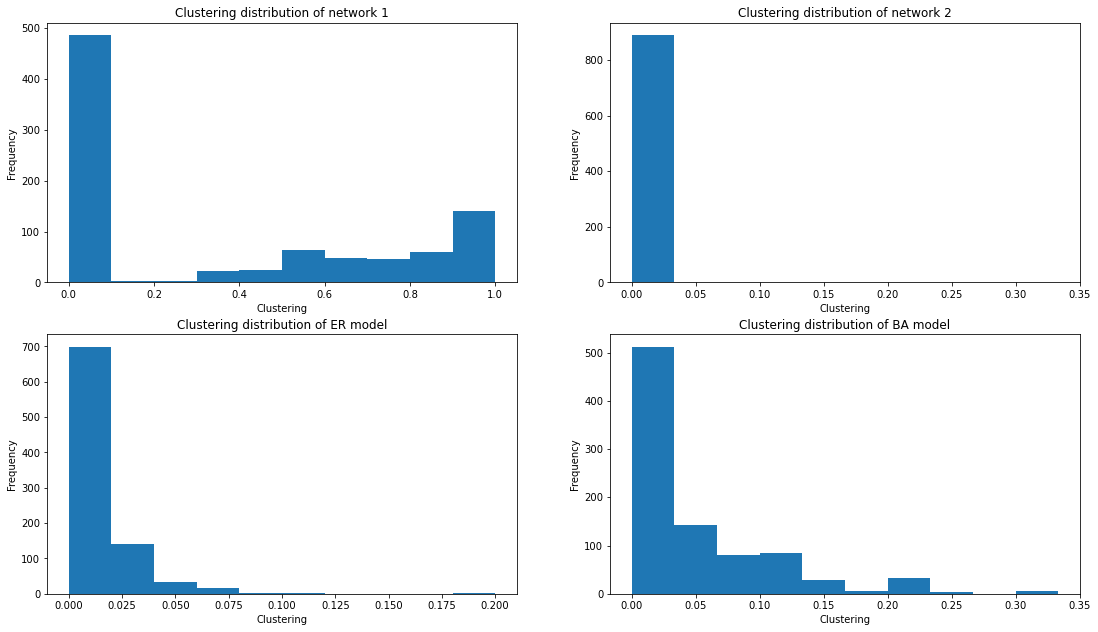

In [13]:
# Clustering coefficient 
def clustering_dist_plt(network, title, axs):
    clu = nx.clustering(network)
    b=[]
    for c in clu.values():
        b.append(c)
    axs.hist(b, bins =10)
    axs.set_title(label = title)
    axs.set_xlabel("Clustering")
    axs.set_ylabel("Frequency")

fig, axs = plt.subplots(2,2)
fig.set_size_inches(18.5, 10.5, forward=True)
clustering_dist_plt(network_1, "Clustering distribution of network 1", axs[0,0])
clustering_dist_plt(network_2, "Clustering distribution of network 2", axs[0,1])
clustering_dist_plt(er_model, "Clustering distribution of ER model", axs[1,0])
clustering_dist_plt(ba_model, "Clustering distribution of BA model", axs[1,1])



In [14]:
# Average clustering 
print(f"Average clustering of network 1: {nx.average_clustering(network_1)}")
print(f"Average clustering of network 2: {nx.average_clustering(network_2)}")
print(f"Average clustering of ER model: {nx.average_clustering(er_model)}")
print(f"Average clustering of BA model: {nx.average_clustering(ba_model)}")


Average clustering of network 1: 0.34501983649618284
Average clustering of network 2: 0.0018175422048431783
Average clustering of ER model: 0.01070723877827998
Average clustering of BA model: 0.04199273165684174


In [15]:
r1 = nx.degree_pearson_correlation_coefficient(network_1)
r2 = nx.degree_pearson_correlation_coefficient(network_2)
r_er = nx.degree_pearson_correlation_coefficient(er_model)
r_ba = nx.degree_pearson_correlation_coefficient(ba_model)
print(f"Degree correlation of network 1: {r1}")
print(f"Degree correlation of network 2: {r2}")
print(f"Degree correlation of ER model: {r_er}")
print(f"Degree correlation of BA model: {r_ba}")
# So, network 1 is disassortative network
# while other network 2 is assortative network
# BA and ER model are neutral to slightly assortative


Degree correlation of network 1: 0.486937774197689
Degree correlation of network 2: -0.5033456760943703
Degree correlation of ER model: 0.03582621225295176
Degree correlation of BA model: -0.048545965957944054


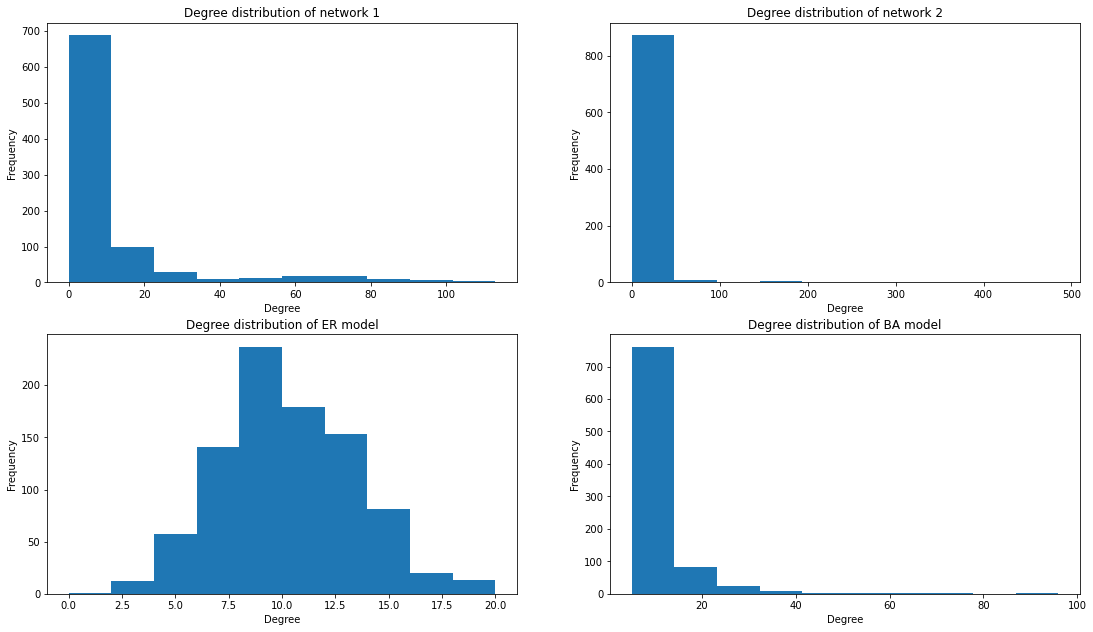

In [16]:
# Degree distribution
def degree_dist_plt(network, title, axs):
    deg = nx.degree(network)
    b=[]
    for c in deg:
        b.append(c[1])
    axs.hist(b, bins =10)
    axs.set_title(label = title)
    axs.set_xlabel("Degree")
    axs.set_ylabel("Frequency")

fig, axs = plt.subplots(2,2)
fig.set_size_inches(18.5, 10.5, forward=True)
degree_dist_plt(network_1, "Degree distribution of network 1", axs[0,0])
degree_dist_plt(network_2, "Degree distribution of network 2", axs[0,1])
degree_dist_plt(er_model, "Degree distribution of ER model", axs[1,0])
degree_dist_plt(ba_model, "Degree distribution of BA model", axs[1,1])
    

# Network robustness

In [17]:
# This part, we will evaluate the network robustness of 4 network
f =np.linspace(0, 1, 100)[:-1]

In [18]:
# Remove f fraction random node from the graph G
import random
def remove_nodes_random(G, f):
    N = G.number_of_nodes()
    k = int(f*N)
    nx.set_node_attributes(G, {node: np.random.rand() for node in G.nodes()}, 'p')
    sorted_nodes_failure = sorted(G.nodes(), key=lambda x: -G.nodes[x]['p'])
    remain_list_failure = sorted_nodes_failure[k:]
    H = nx.subgraph(G, remain_list_failure)
    return H

# Remove f fraction highest degree node from graph G
def remove_nodes_attack(G, f):
    N = G.number_of_nodes()
    k = int(f*N)
    nx.set_node_attributes(G, dict(G.degree()), 'd')
    sorted_nodes_attack = sorted(G.nodes(), key=lambda x: -G.nodes[x]['d'])
    remain_list_attack = sorted_nodes_attack[k:]
    H = nx.subgraph(G, remain_list_attack)
    return H

# Calculate fraction of node belong to largest giant component
def fraction_gc(H, f):
    components = sorted(nx.connected_components(H), key=len, reverse=True)
    if len(components) > 1:
        if len(components[0]) > len(components[1]):
            P = float(len(components[0]))/H.number_of_nodes()
        else:
            P = 0   
    else:
        P = 1
    return P



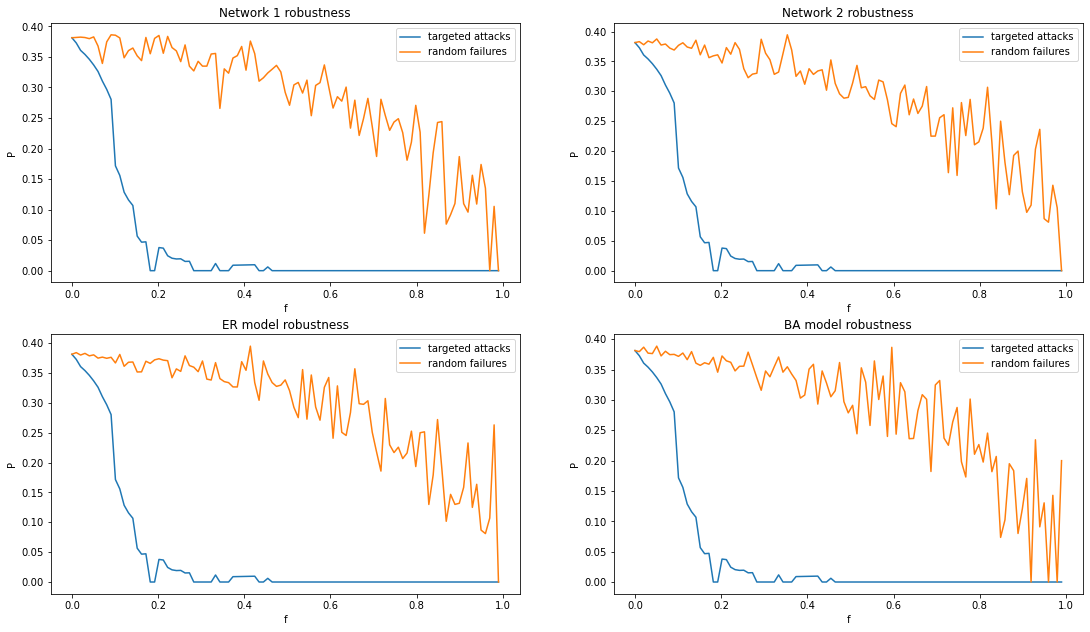

In [30]:
# Plot the figure for Random Network
fig, axs = plt.subplots(2,2)
fig.set_size_inches(18.5, 10.5, forward=True)

# Simulate the targeted attacks and random failure in 4 networkx
def failure_simulation(network, title, axs):
    # The fraction list for attack
    Pa_gc = []
    # The fraction list for failure
    Pf_gc = []
    for f0 in f:
        # Make the failure graph and fraction list
        Hf = remove_nodes_random(network_1, f0)
        Pf_gc.append(fraction_gc(Hf, f0))
        # Make the attack graph and fraction list
        Ha = remove_nodes_attack(network_1, f0)
        Pa_gc.append(fraction_gc(Ha, f0))

    axs.plot(f, Pa_gc, label = "targeted attacks")
    axs.plot(f, Pf_gc, label = "random failures")
    axs.set_xlabel("f")
    axs.set_ylabel("P")
    #plt.axvline(fc, color='r', label = "Threshold")
    axs.legend(loc ="upper right")
    axs.set_title(title)
    axs.axis("tight")
    

failure_simulation(network_1,"Network 1 robustness", axs[0,0])
failure_simulation(network_2,"Network 2 robustness", axs[0,1])
failure_simulation(er_model,"ER model robustness", axs[1,0])
failure_simulation(ba_model,"BA model robustness", axs[1,1])

In [20]:
# Compare the assortivity of 4 networks
def assortive_plot(g_network, network_name, axs):
    # Calculate <k> 
    degrees = [degree for _, degree in g_network.degree()]
    k_max = max(degrees)
    
    # Calculate <k_nn(k)> 
    k_nn = nx.average_degree_connectivity(g_network)
    k, knn = zip(*[(x, y) for x, y in k_nn.items()])
    axs.scatter(k, knn, label='acual')
    
    # Draw the line for random network approximation
    k_nn_rand_exp = sum([degree**2 for degree in degrees]) / sum(degrees)
    axs.axhline(k_nn_rand_exp, c='k', label='random')
    
    # Calculate k and knn for random multiple link graph
    g_random_multiple = nx.configuration_model(degrees)
    k_nn_multiple = nx.average_degree_connectivity(g_random_multiple)
    axs.scatter(k_nn_multiple.keys(), k_nn_multiple.values(), label='(R-M)')
    
    
    # Assortativity coefficient of g_network
    r = nx.degree_assortativity_coefficient(g_network)
    
    # Plot
    axs.loglog()
    axs.legend()
    axs.set_xlabel("<k>")
    axs.set_ylabel("<knn(k)>")
    axs.set_title(fr'{network_name}, degree assortativity $r={r:.2f}$')
    

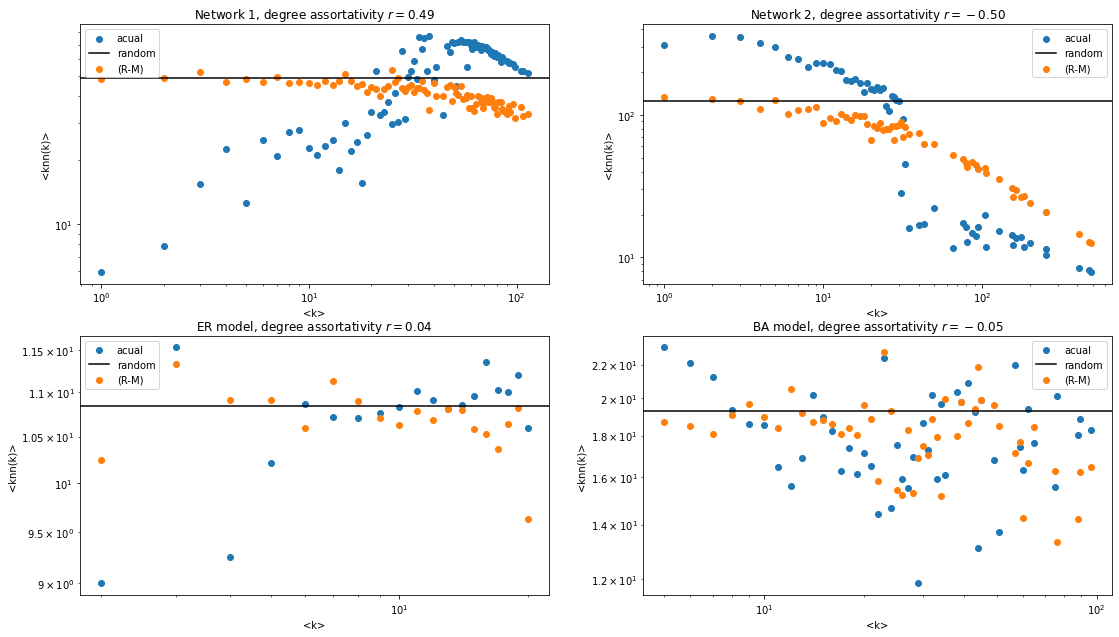

In [21]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(18.5, 10.5, forward=True)
assortive_plot(network_1, "Network 1", axs[0,0])
assortive_plot(network_2, "Network 2", axs[0,1])
assortive_plot(er_model, "ER model", axs[1,0])
assortive_plot(ba_model, "BA model", axs[1,1])

# Spreading simulation

In [22]:
def infect_node(G, n=1):
    
    # Determined list of infectious nodes
    infected_list = random.sample(G.nodes(), k= n)
    infected_atr_dict = {}
    infection_time = {}
    recovered_dict = {}
    # make a boolen list of infected and non-infected
    for node in G.nodes():
        recovered_dict[node] = False
        if node in infected_list:
            infected_atr_dict[node] = True
            # Set infection time = 0 for initial list
            infection_time[node] = 0
        else:
            infected_atr_dict[node] = False
            infection_time[node] = -1
    
    nx.set_node_attributes(G, infected_atr_dict, "Infected")
    nx.set_node_attributes(G, infection_time, "Infection_time")
    nx.set_node_attributes(G, recovered_dict, "Recovered")
    
def plot(G,axs, title=None):
    pos = nx.spring_layout(G)
    G.graph["pos"] = pos
    # Make a list to color according to infectious status
    node_colors = []
    isInfected = nx.get_node_attributes(G, "Infected")
    isRecovered = nx.get_node_attributes(G, "Recovered")
    for node in G.nodes:
        if isInfected[node]:
            node_colors.append("red")
        elif isRecovered[node]:
            node_colors.append("blue")
        else:
            node_colors.append("green")
        
    nx.draw(G, pos=G.graph["pos"] , node_size=30 , node_color=node_colors, ax = axs)
    axs.set_title(title)
    

In [23]:
def spread(G, p, mu):
    N = G.number_of_nodes() 
    # Lambda function to count current infectious node
    wI = lambda G: sum(nx.get_node_attributes(G, 'Infected').values())
    # Lambda function to count current recovered node
    wR = lambda G: sum(nx.get_node_attributes(G, 'Recovered').values())
    # Lambda function to count current rnot yet infected and nerver recovered
    wS = lambda G: N - wI(G) - wR(G)
    # Reset a graph
    # if infection time != 0, change to -1 and infected = False,
    #Recovered all = False
    node_attr_time = nx.get_node_attributes(G, 'Infection_time')
    node_attr_infected = nx.get_node_attributes(G, 'Infected')
    node_attr_recovered = nx.get_node_attributes(G, 'Recovered')
    
    for node in G.nodes():
        node_attr_recovered[node] = False
        if node_attr_time[node] != 0:
            node_attr_time[node] = -1
            node_attr_infected[node] = False
        else:
            node_attr_infected[node] = True

    # Set attributes for reseted network
    nx.set_node_attributes(G, node_attr_infected, "Infected")
    nx.set_node_attributes(G, node_attr_recovered, "Recovered")
    nx.set_node_attributes(G, node_attr_time, "Infection_time")
    G.graph["t"] = 0
    
    # Initizalize St, It, Rt
    It = [wI(G)]
    Rt = [wR(G)]
    St = [wS(G)]
    t = 0
    isComplete = False
    
    # Is G already saturated
    if wI(G) == 0:
        isComplete = True
    while isComplete == False:

        t = t+1
        H = G
        # We make a copy H of G
        # Every possible changes are made on H 
        # then later update to G
        
        # At each step, some node recover:
        if t != 1:
            for node in G.nodes():
                if G.nodes[node]["Infected"]:
                    s = np.random.rand() 
                    isRecovered = (s < mu) # Decide if recover or not
                    if isRecovered:
                        G.nodes[node]["Infected"] = False
                        G.nodes[node]["Recovered"] = True
                
        # Spreading
        for e in G.edges():
            u = e[0]
            v = e[1]
                
            # If 2 node of an edge have different status,
            # they have the possibility for one infected not infect the other
            if (G.nodes[u]["Infected"] != G.nodes[v]["Infected"]) and (G.nodes[u]["Recovered"] == False) and (G.nodes[v]["Recovered"] == False):
                    
                isSpread = (np.random.rand() < p) # decice if infect or not
                if isSpread:
                    H.nodes[u]["Infected"] = True
                    H.nodes[v]["Infected"] = True
                    
                    if G.nodes[u]['Infection_time']  == -1:
                        if H.nodes[u]['Infection_time'] == -1:
                            H.nodes[u]['Infection_time'] = t
                    elif G.nodes[v]['Infection_time']  == -1:
                        if H.nodes[v]['Infection_time'] == -1:
                            H.nodes[v]['Infection_time'] = t
                
        G = H
        St.append(wS(G))
        It.append(wI(G))
        Rt.append(wR(G))
        if wI(G) ==0:
            isComplete = True
            G.graph["t"] = t
    return St, It, Rt, t
            
# Calculate mean for vectors of different length
def tolerant_mean(arrs):
    lens = [len(i) for i in arrs]
    arr = np.ma.empty((np.max(lens),len(arrs)))
    arr.mask = True
    for idx, l in enumerate(arrs):
        arr[:len(l),idx] = l
    return arr.mean(axis = -1)


# Run the spreding over 10 simulation 
# Calculate the average  of S(t), I(t), R(t)
# and average time t to finish the spreading process
def plot_simulations(G,axs, p, mu, G_name):
    St = []
    It = []
    Rt = []
    t = 0

    for b in tqdm(range(10)):
        infect_node(G, 5)
        [St_b, It_b, Rt_b, t_b] = np.array(spread(G, p=p, mu = mu))
        St.append(St_b)
        It.append(It_b)
        Rt.append(Rt_b)
        t = t+t_b
         
    average_st = tolerant_mean(St)
    average_it = tolerant_mean(It)
    average_rt = tolerant_mean(Rt)
    average_t = t/10
         
    axs.plot(average_st/n_node,  label='S', color = "blue")
    axs.plot(average_it/n_node,  label='I', color = "red")
    axs.plot(average_rt/n_node,  label='R', color = "green")
    axs.axhline(1, ls=':', lw=1)
    axs.set_xlabel(r'$t$', fontsize=16)
    axs.set_ylabel('Percentage of node %', fontsize=16)
    axs.set_title(f"Spreading effect on {G_name}")
    axs.legend(loc="upper right")
    
    print(f"Average spreading time of {G_name}: {average_t}")


  0%|                                                                                      | 0/10 [00:00<?, ?it/s]/var/folders/kr/bcfd33n546q4hgfqznq2t4t00000gn/T/ipykernel_82835/1888901345.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_list = random.sample(G.nodes(), k= n)
/var/folders/kr/bcfd33n546q4hgfqznq2t4t00000gn/T/ipykernel_82835/1824893420.py:109: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  [St_b, It_b, Rt_b, t_b] = np.array(spread(G, p=p, mu = mu))
100%|█████████████████████████████████████████████████████████████████████████████| 10/10 [09:28<00:00, 56.83s/it]


Average spreading time of Network 1: 6451.5


  0%|                                                                                      | 0/10 [00:00<?, ?it/s]/var/folders/kr/bcfd33n546q4hgfqznq2t4t00000gn/T/ipykernel_82835/1888901345.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_list = random.sample(G.nodes(), k= n)
/var/folders/kr/bcfd33n546q4hgfqznq2t4t00000gn/T/ipykernel_82835/1824893420.py:109: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  [St_b, It_b, Rt_b, t_b] = np.array(spread(G, p=p, mu = mu))
100%|█████████████████████████████████████████████████████████████████████████████| 10/10 [10:30<00:00, 63.03s/it]


Average spreading time of Network 2: 7363.7


  0%|                                                                                      | 0/10 [00:00<?, ?it/s]/var/folders/kr/bcfd33n546q4hgfqznq2t4t00000gn/T/ipykernel_82835/1888901345.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_list = random.sample(G.nodes(), k= n)
/var/folders/kr/bcfd33n546q4hgfqznq2t4t00000gn/T/ipykernel_82835/1824893420.py:109: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  [St_b, It_b, Rt_b, t_b] = np.array(spread(G, p=p, mu = mu))
100%|█████████████████████████████████████████████████████████████████████████████| 10/10 [09:47<00:00, 58.77s/it]


Average spreading time of ER model: 7013.0


  0%|                                                                                      | 0/10 [00:00<?, ?it/s]/var/folders/kr/bcfd33n546q4hgfqznq2t4t00000gn/T/ipykernel_82835/1888901345.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_list = random.sample(G.nodes(), k= n)
/var/folders/kr/bcfd33n546q4hgfqznq2t4t00000gn/T/ipykernel_82835/1824893420.py:109: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  [St_b, It_b, Rt_b, t_b] = np.array(spread(G, p=p, mu = mu))
100%|█████████████████████████████████████████████████████████████████████████████| 10/10 [10:12<00:00, 61.25s/it]


Average spreading time of BA model: 7342.1


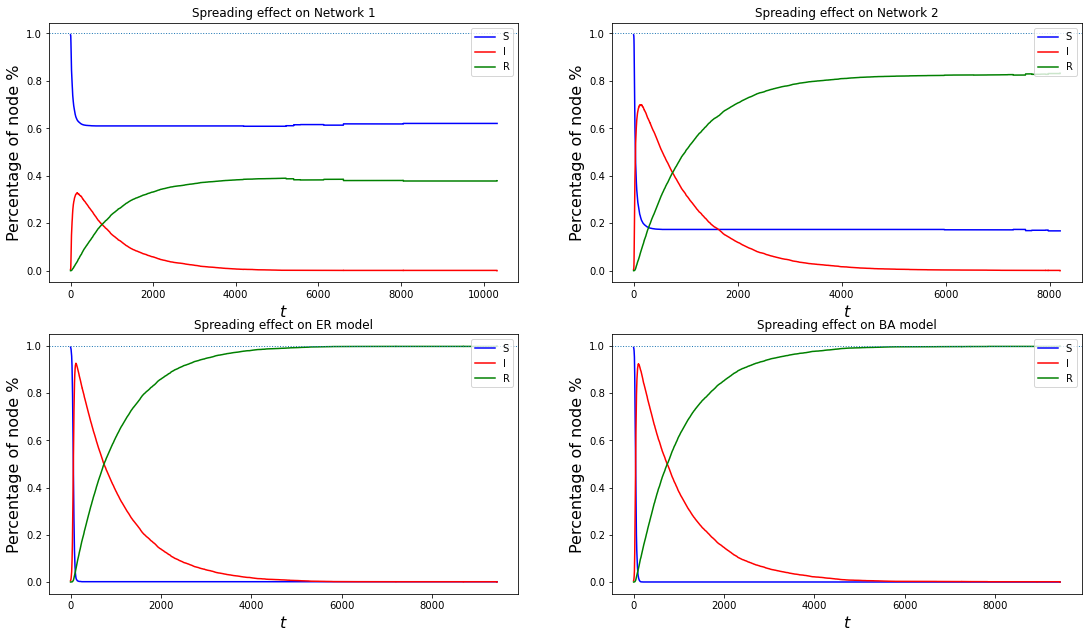

In [24]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(18.5, 10.5, forward=True)
plot_simulations(network_1, axs[0,0], p =0.01, mu = 0.001, G_name = "Network 1"  )
plot_simulations(network_2, axs[0,1], p =0.01, mu = 0.001, G_name = "Network 2" )
plot_simulations(er_model, axs[1,0], p =0.01, mu = 0.001, G_name = "ER model" )
plot_simulations(ba_model, axs[1,1], p =0.01, mu = 0.001, G_name = "BA model" )

In [25]:
def investigate_mu(G,axs1, axs2, p, G_name):
    It = []
    t = []
    # Evaluate mu over percentage of p
    mu = np.arange(p/10, 1.05*p, p/10)
    for b in tqdm(range(10)):
        infect_node(G, 5)
        [St_b, It_b, Rt_b, t_b] = np.array(spread(G, p=p, mu = mu[b]))
        It.append(max(It_b))
        t.append(t_b)

    # Size of the infection max It
    axs1.plot(mu, It,  label='I', color = "red")
    axs1.set_xlabel(r'$mu$', fontsize=16)
    axs1.set_ylabel('It_max', fontsize=16)
    axs1.set_title(f"Max infectious node in {G_name}")
    
    # Time to finish the spreading
    axs2.plot(mu, t)
    axs2.set_xlabel(r'$mu$', fontsize=16)
    axs2.set_ylabel('Time for spreading', fontsize=16)
    axs2.set_title(f"Max spreading time in {G_name}")

  0%|                                                                                      | 0/10 [00:00<?, ?it/s]/var/folders/kr/bcfd33n546q4hgfqznq2t4t00000gn/T/ipykernel_82835/1888901345.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_list = random.sample(G.nodes(), k= n)
/var/folders/kr/bcfd33n546q4hgfqznq2t4t00000gn/T/ipykernel_82835/3446460704.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  [St_b, It_b, Rt_b, t_b] = np.array(spread(G, p=p, mu = mu[b]))
  0%|                                                                                      | 0/10 [00:00<?, ?it/s]/var/folders/kr/bcfd33n546q4hgfqznq2t4t00000gn/T/ipykernel_82835/1888901345.py:4: DeprecationWarning: Sampling from

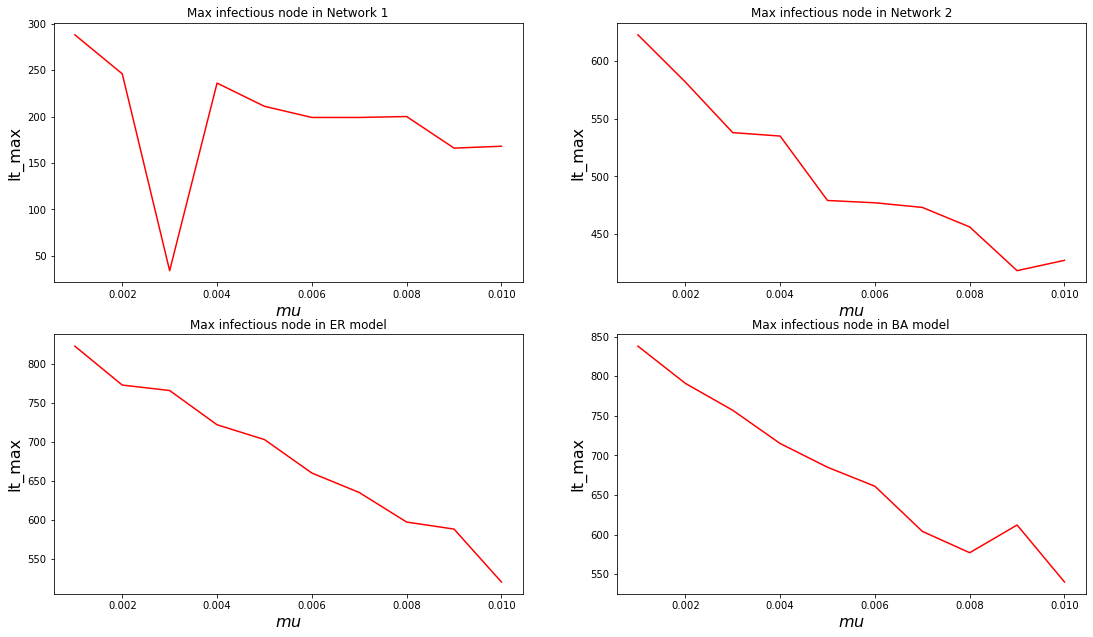

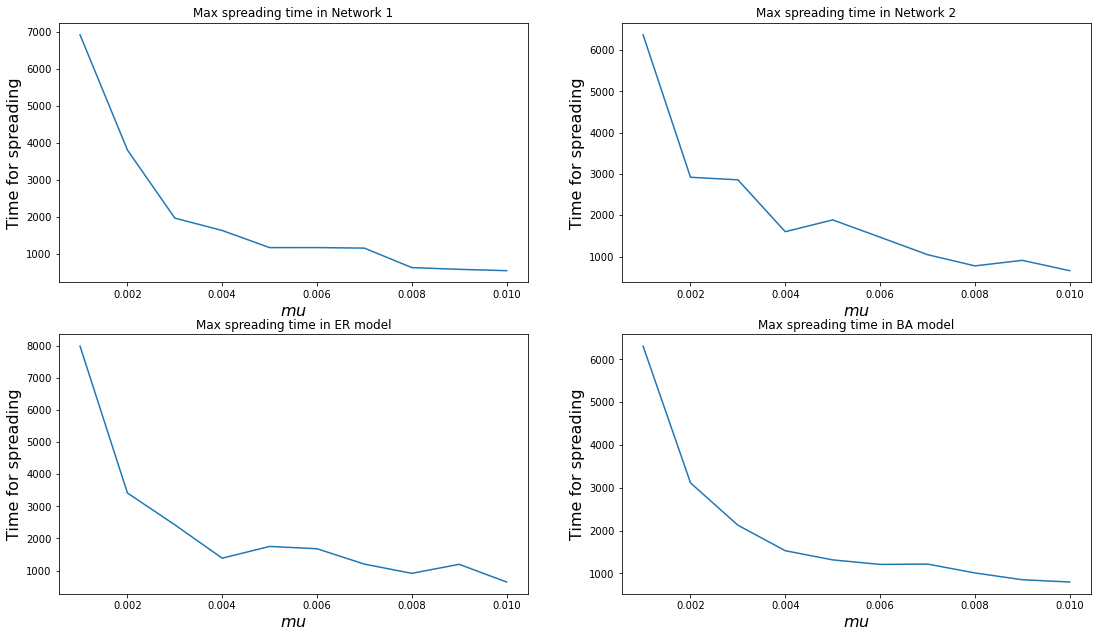

In [26]:
fig1, axs1 = plt.subplots(2,2)
fig1.set_size_inches(18.5, 10.5, forward=True)

fig2, axs2 = plt.subplots(2,2)
fig2.set_size_inches(18.5, 10.5, forward=True)

investigate_mu(network_1, axs1[0,0], axs2[0,0] , p =0.01,  G_name = "Network 1" )
investigate_mu(network_2, axs1[0,1], axs2[0,1], p =0.01,   G_name = "Network 2" )
investigate_mu(er_model, axs1[1,0], axs2[1,0], p =0.01,  G_name= "ER model" )
investigate_mu(ba_model, axs1[1,1], axs2[1,1], p =0.01,  G_name = "BA model" )